# Testing Dose Calculator Function
I'll do initial testing stuff and miscellaneous things here and then add them into `dose_calculator_tests.py`.

In [1]:
%pylab ipympl 
%load_ext autoreload
import siddon as sd
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle

Populating the interactive namespace from numpy and matplotlib


In [ ]:
'''
making mu interpolation function
'''
coeff_array = np.loadtxt(filename,skiprows=2,dtype=float)

e_a_coeffs = [] # energy absorption coefficients

for row in coeff_array:
    e_a_coeffs.append([row[0],row[1]])
e_a_coeffs = np.array(e_a_coeffs)

# exponentially interpolate 
mu_energy = interpolate.interp1d(np.log(e_a_coeffs.T[0]),np.log(e_a_coeffs.T[1]),kind='linear',fill_value='extrapolate')
mu = lambda energy, material: np.exp(mu_energy(log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

In [2]:
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 16
Ny = 16
Nz = 16

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.05
dy = 0.05
dz = 0.05

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (-0.8,0.8)

# initial plane coordinates
xplane1 = -0.8
yplane1 = -0.8
zplane1 = -0.8

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**8 # photon/cm^2
filename = 'energy_absorption_coeff.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

siddon = sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1))
terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,mu)
dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size)


In [3]:
shape(dose)

(15, 15, 15)

In [7]:
dose_im_array = []

for dose_row in dose:
    dose_im_array.append(dose_row['energy'])

dose_im_array = np.array(dose_im_array)

dose_im_array = dose_im_array.reshape(Nx-1,Ny-1,Nz-1)

pickle.dump(dose_im_array,open('dose_test.pickle','wb'))

In [21]:
a = array([1,2])
b = []

6

### Slider to Look at 3D Stuff

In [3]:
kernelname = '../Topas/RealKernel1.csv'
data = BinnedResult(kernelname).data['Sum']

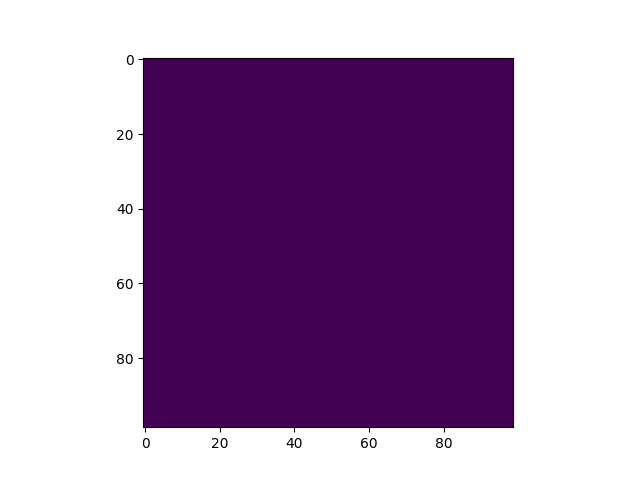

In [4]:
fig,ax,controls = ims.slider(data)

In [5]:
my_dose_array = pickle.load(open('dose_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

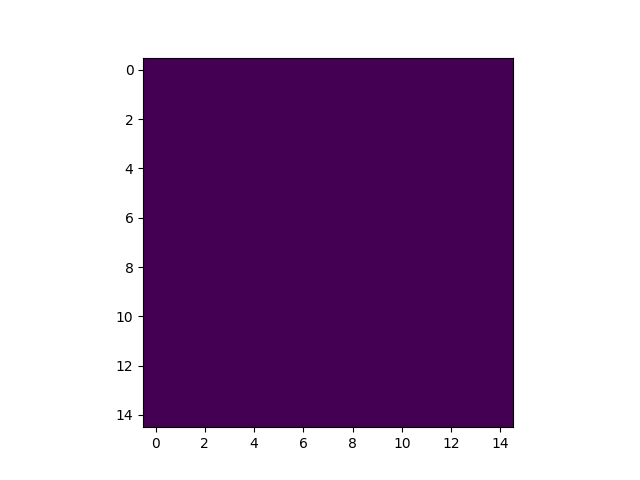

In [4]:
fig,ax,controls = ims.slider(dose)

In [9]:
print(sum(my_dose_array)*1.602e-10,sum(mc_dose_array))

0.03631941168294036 0.0009266880412018293


### Tests for Superposition

In [4]:
test_kernel = array([[[0,0,0],[0,0.1,0],[0,0,0]],
                     [[0,0.1,0],[0.1,0.4,0.1],[0,0.1,0]],
                     [[0,0,0],[0,0.1,0],[0,0,0]]])

In [5]:
test_array_1 = array([[[1,1],[1,1]],
                      [[1,1],[1,1]]])
voxel_info_1 = []
n=0
for x in range(len(test_array_1)):
    for y in range(len(test_array_1[0])):
        for z in range(len(test_array_1[0][0])):
            voxel_info_1.append({})
            voxel_info_1[n]['indices'] = (x+1,y+1,z+1)
            voxel_info_1[n]['TERMA'] = 1
            voxel_info_1[n]['d'] = 1
            n += 1

voxel_info_1

[{'indices': (1, 1, 1), 'TERMA': 1, 'd': 1},
 {'indices': (1, 1, 2), 'TERMA': 1, 'd': 1},
 {'indices': (1, 2, 1), 'TERMA': 1, 'd': 1},
 {'indices': (1, 2, 2), 'TERMA': 1, 'd': 1},
 {'indices': (2, 1, 1), 'TERMA': 1, 'd': 1},
 {'indices': (2, 1, 2), 'TERMA': 1, 'd': 1},
 {'indices': (2, 2, 1), 'TERMA': 1, 'd': 1},
 {'indices': (2, 2, 2), 'TERMA': 1, 'd': 1}]

In [6]:
sd.Superposition(test_kernel,(2,2,2),(3,3,3),(2,2,2),[voxel_info_1])
# sd.Superposition?

AttributeError: Can't pickle local object 'Superposition.<locals>.mask_superimpose'

Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/pytho

In [7]:
from multiprocessing import Pool
p = Pool(6)
p.map?

Signature: p.map(func, iterable, chunksize=None)
Docstring:
Apply `func` to each element in `iterable`, collecting the results
in a list that is returned.
File:      /usr/lib/python3.6/multiprocessing/pool.py
Type:      method


Process ForkPoolWorker-10:
Process ForkPoolWorker-8:
Process ForkPoolWorker-6:
Process ForkPoolWorker-9:
Process ForkPoolWorker-7:
Process ForkPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessi